In [5]:
import pandas as pd
application = pd.read_csv('2.application_test.csv')
bureau = pd.read_csv('3.bureau.csv')
credit_card = pd.read_csv('6.credit_card_balance.csv')
installments = pd.read_csv('7.installments_payments.csv')
previous = pd.read_csv('8.previous_application.csv')

## EXPLORING DATA

### FACILITATING NEW VARIABLES

In [6]:
import pandas as pd
# Giả sử 'data' là tên của DataFrame của bạn
# Thay đổi tên cột nếu cần thiết
selected_columns = [
'SK_ID_CURR',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'OCCUPATION_TYPE',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3']
# Sử dụng loc để trích xuất các cột
application1 = application.loc[:, selected_columns]

# In ra một số dòng đầu của DataFrame mới
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,Married,House / apartment,0.018850,-19241,-2329,NaN,0.752614,0.789654,0.159520
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,Low-skill Laborers,0.564990,0.291656,0.432962
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,Married,House / apartment,0.019101,-20038,-4458,Drivers,NaN,0.699787,0.610991
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,Sales staff,0.525734,0.509677,0.612704
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,NaN,0.202145,0.425687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,NaN,NaN,0.648575,0.643026
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149,Sales staff,NaN,0.684596,NaN
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037,NaN,0.733503,0.632770,0.283712
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,Married,House / apartment,0.018850,-13968,-2731,Managers,0.373090,0.445701,0.595456


In [7]:
application1['BUREAU_SCORE'] = application1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
application1['credit_annuity_ratio'] = application1['AMT_CREDIT']/application1['AMT_ANNUITY']
application1['credit_goods_price_ratio'] = application1['AMT_GOODS_PRICE']/application1['AMT_CREDIT'] # Mức độ tài trợ của khoản vay
application1['DEBT_TO_INCOME_RATIO'] = application1['AMT_CREDIT']/application1['AMT_INCOME_TOTAL']
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,-19241,-2329,NaN,0.752614,0.789654,0.159520,0.567263,27.664697,0.791139,4.213333
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,-18064,-4469,Low-skill Laborers,0.564990,0.291656,0.432962,0.429869,12.824870,0.808016,2.250182
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,-20038,-4458,Drivers,NaN,0.699787,0.610991,0.655389,9.505482,0.949848,3.275378
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,-13976,-1866,Sales staff,0.525734,0.509677,0.612704,0.549372,32.130726,1.000000,5.000000
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,-13040,-2191,NaN,0.202145,0.425687,NaN,0.313916,19.506034,1.000000,3.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,-19970,-5169,NaN,NaN,0.648575,0.643026,0.645800,23.610610,0.654450,3.395556
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,-11186,-1149,Sales staff,NaN,0.684596,NaN,0.684596,19.505570,0.795292,3.951829
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,-15922,-3037,NaN,0.733503,0.632770,0.283712,0.549995,9.486380,1.000000,1.555556
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,-13968,-2731,Managers,0.373090,0.445701,0.595456,0.471416,17.908309,1.000000,2.000000


In [9]:
# Xóa các dòng có CODE_GENDER là 'XNA'
application1 = application1[application1['CODE_GENDER'] != 'XNA']
application1 = application1[application1['NAME_FAMILY_STATUS'] != 'Unknown']
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,-19241,-2329,NaN,0.752614,0.789654,0.159520,0.567263,27.664697,0.791139,4.213333
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,-18064,-4469,Low-skill Laborers,0.564990,0.291656,0.432962,0.429869,12.824870,0.808016,2.250182
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,-20038,-4458,Drivers,NaN,0.699787,0.610991,0.655389,9.505482,0.949848,3.275378
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,-13976,-1866,Sales staff,0.525734,0.509677,0.612704,0.549372,32.130726,1.000000,5.000000
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,-13040,-2191,NaN,0.202145,0.425687,NaN,0.313916,19.506034,1.000000,3.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,-19970,-5169,NaN,NaN,0.648575,0.643026,0.645800,23.610610,0.654450,3.395556
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,-11186,-1149,Sales staff,NaN,0.684596,NaN,0.684596,19.505570,0.795292,3.951829
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,-15922,-3037,NaN,0.733503,0.632770,0.283712,0.549995,9.486380,1.000000,1.555556
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,-13968,-2731,Managers,0.373090,0.445701,0.595456,0.471416,17.908309,1.000000,2.000000


In [10]:
# Tạo DataFrame mới chỉ chứa hai cột 'SK_ID_CURR' và 'COUNT_SK_ID_BUREAU'
Number_of_public_records = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count().reset_index(name='AMT_public_records')
# In ra một số dòng đầu của DataFrame mới
Number_of_public_records

,SK_ID_CURR,AMT_public_records
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


In [11]:
import numpy as np
# Thực hiện merge để thêm cột Number of public records vào df_application1
application1 = pd.merge(application1, Number_of_public_records[['SK_ID_CURR', 'AMT_public_records']], on='SK_ID_CURR', how='left')
# Điền giá trị 0 cho những SK_ID_CURR không có trong bảng Number_of_public_records
application1['Age'] = application1['DAYS_BIRTH'] /(-365)
# NaN values for DAYS_EMPLOYED: 365.243 -> nan
application1['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
application1['NEW_EMPLOY_TO_BIRTH_RATIO'] = application1['DAYS_EMPLOYED'] / application1['DAYS_BIRTH']
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,0.752614,0.789654,0.159520,0.567263,27.664697,0.791139,4.213333,7.0,52.715068,0.121044
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,0.564990,0.291656,0.432962,0.429869,12.824870,0.808016,2.250182,3.0,49.490411,0.247398
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,NaN,0.699787,0.610991,0.655389,9.505482,0.949848,3.275378,4.0,54.898630,0.222477
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,0.525734,0.509677,0.612704,0.549372,32.130726,1.000000,5.000000,12.0,38.290411,0.133515
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,0.202145,0.425687,NaN,0.313916,19.506034,1.000000,3.475000,NaN,35.726027,0.168021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,NaN,0.648575,0.643026,0.645800,23.610610,0.654450,3.395556,5.0,54.712329,0.258838
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,NaN,0.684596,NaN,0.684596,19.505570,0.795292,3.951829,NaN,30.646575,0.102718
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,0.733503,0.632770,0.283712,0.549995,9.486380,1.000000,1.555556,5.0,43.621918,0.190742
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,0.373090,0.445701,0.595456,0.471416,17.908309,1.000000,2.000000,17.0,38.268493,0.195518


In [12]:
Time_at_bureau = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].min().reset_index(name='Time_at_bureau')
Time_at_bureau
# Chia cột 'Time at bureau' cho -365 bằng cách sử dụng toán tử chia
Time_at_bureau['Time_at_bureau'] /= -365
Time_at_bureau #Tính theo năm


,SK_ID_CURR,Time_at_bureau
0,100001,4.306849
1,100002,3.936986
2,100003,7.084932
3,100004,3.632877
4,100005,1.021918
...,...,...
305806,456249,7.432877
305807,456250,2.745205
305808,456253,2.517808
305809,456254,3.024658


In [13]:
application1 = pd.merge(application1, Time_at_bureau[['SK_ID_CURR', 'Time_at_bureau']], on='SK_ID_CURR', how='left')
# Điền giá trị 0 cho những SK_ID_CURR không có trong bảng Number_of_public_records
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,EXT_SOURCE_2,EXT_SOURCE_3,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,0.789654,0.159520,0.567263,27.664697,0.791139,4.213333,7.0,52.715068,0.121044,4.306849
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,0.291656,0.432962,0.429869,12.824870,0.808016,2.250182,3.0,49.490411,0.247398,1.021918
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,0.699787,0.610991,0.655389,9.505482,0.949848,3.275378,4.0,54.898630,0.222477,5.671233
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,0.509677,0.612704,0.549372,32.130726,1.000000,5.000000,12.0,38.290411,0.133515,5.767123
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,0.425687,NaN,0.313916,19.506034,1.000000,3.475000,NaN,35.726027,0.168021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,0.648575,0.643026,0.645800,23.610610,0.654450,3.395556,5.0,54.712329,0.258838,3.663014
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,0.684596,NaN,0.684596,19.505570,0.795292,3.951829,NaN,30.646575,0.102718,NaN
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,0.632770,0.283712,0.549995,9.486380,1.000000,1.555556,5.0,43.621918,0.190742,2.786301
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,0.445701,0.595456,0.471416,17.908309,1.000000,2.000000,17.0,38.268493,0.195518,7.501370


In [14]:
# Đếm số lượng giá trị "Active" trong cột 'CREDIT_ACTIVE' theo từng nhóm 'SK_ID_CURR'
count_active = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['CREDIT_ACTIVE'].count().reset_index(name='COUNT_ACTIVE')
count_active
#SK_ID_CURR không có thì tự fill bằng 0

,SK_ID_CURR,COUNT_ACTIVE
0,100001,3
1,100002,2
2,100003,1
3,100005,2
4,100008,1
...,...,...
251810,456247,3
251811,456249,2
251812,456250,2
251813,456253,2


In [15]:
application1 = pd.merge(application1, count_active[['SK_ID_CURR', 'COUNT_ACTIVE']], on='SK_ID_CURR', how='left')
# Điền giá trị 0 cho những SK_ID_CURR không có trong bảng Number_of_public_records
application1['COUNT_ACTIVE'].fillna(0, inplace=True)
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,EXT_SOURCE_3,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,0.159520,0.567263,27.664697,0.791139,4.213333,7.0,52.715068,0.121044,4.306849,3.0
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,0.432962,0.429869,12.824870,0.808016,2.250182,3.0,49.490411,0.247398,1.021918,2.0
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,0.610991,0.655389,9.505482,0.949848,3.275378,4.0,54.898630,0.222477,5.671233,0.0
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,0.612704,0.549372,32.130726,1.000000,5.000000,12.0,38.290411,0.133515,5.767123,5.0
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,NaN,0.313916,19.506034,1.000000,3.475000,NaN,35.726027,0.168021,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,0.643026,0.645800,23.610610,0.654450,3.395556,5.0,54.712329,0.258838,3.663014,2.0
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,NaN,0.684596,19.505570,0.795292,3.951829,NaN,30.646575,0.102718,NaN,0.0
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,0.283712,0.549995,9.486380,1.000000,1.555556,5.0,43.621918,0.190742,2.786301,1.0
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,0.595456,0.471416,17.908309,1.000000,2.000000,17.0,38.268493,0.195518,7.501370,6.0


In [16]:
import pandas as pd

# Giả sử df_credit_card là DataFrame chứa dữ liệu credit_card
# df_credit_card = ...

# Tìm giá trị lớn nhất của MONTHS_BALANCE theo SK_ID_CURR
max_months_balance = credit_card.groupby('SK_ID_CURR')['MONTHS_BALANCE'].min()

# Tạo DataFrame mới chứa thông tin về thời gian làm khách hàng
df_time_as_customer = pd.DataFrame({'SK_ID_CURR': max_months_balance.index, 'TIME_AS_CUSTOMER': max_months_balance.values/(-12)})
df_time_as_customer #tính theo năm

,SK_ID_CURR,TIME_AS_CUSTOMER
0,100006,0.500000
1,100011,6.250000
2,100013,8.000000
3,100021,1.500000
4,100023,0.916667
...,...,...
103553,456244,3.416667
103554,456246,0.750000
103555,456247,8.000000
103556,456248,2.000000


In [17]:
application1 = pd.merge(application1, df_time_as_customer[['SK_ID_CURR', 'TIME_AS_CUSTOMER']], on='SK_ID_CURR', how='left')

In [18]:
# Tính toán giá trị của cột INTEREST_RATE từ bảng các khoản vay trước đó
previous['INTEREST_RATE'] = ((previous['AMT_ANNUITY'] * previous['CNT_PAYMENT']) / previous['AMT_CREDIT']).pow(1 / (previous['CNT_PAYMENT'] / 12)) - 1

In [19]:
# Thay thế giá trị INTEREST_RATE bằng 0 nếu CNT_PAYMENT là 0
previous.loc[previous['CNT_PAYMENT'] == 0, 'INTEREST_RATE'] = 0

In [20]:
interest_rate_lt_zero = previous[previous['INTEREST_RATE'] < 0]
interest_rate_lt_zero

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,INTEREST_RATE
850275,1884530,113164,Consumer loans,7394.310,90000.0,90000.0,20700.0,90000.0,SATURDAY,7,...,12.0,middle,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN,-0.014092
1648210,2727567,377214,Consumer loans,10043.415,58495.5,62212.5,5400.0,58495.5,MONDAY,14,...,6.0,middle,POS household with interest,365243.0,-1466.0,-1316.0,-1316.0,-1302.0,0.0,-0.061768


In [21]:
previous = previous[previous['INTEREST_RATE'] > 0]
previous

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,INTEREST_RATE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0.211150
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0.100870
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0.324559
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0.199040
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,0.377041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0,0.149473
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0,0.235999
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0,0.150253
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0,0.177081


In [22]:
previous[previous['SK_ID_CURR']==100001]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,INTEREST_RATE
201668,1369693,100001,Consumer loans,3951.0,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0,0.531743


In [23]:
INTEREST_RATE = previous.groupby('SK_ID_CURR')['INTEREST_RATE'].mean()
df_INTEREST_RATE = pd.DataFrame({'SK_ID_CURR': INTEREST_RATE.index, 'PREV_IR': INTEREST_RATE.values})
df_INTEREST_RATE 

,SK_ID_CURR,PREV_IR
0,100001,0.531743
1,100002,0.113589
2,100003,0.187389
3,100004,0.210678
4,100005,0.438440
...,...,...
336154,456251,0.493054
336155,456252,0.131673
336156,456253,0.488364
336157,456254,0.292174


In [24]:
application1 = pd.merge(application1, df_INTEREST_RATE[['SK_ID_CURR', 'PREV_IR']], on='SK_ID_CURR', how='left')
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,TIME_AS_CUSTOMER,PREV_IR
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,27.664697,0.791139,4.213333,7.0,52.715068,0.121044,4.306849,3.0,NaN,0.531743
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,12.824870,0.808016,2.250182,3.0,49.490411,0.247398,1.021918,2.0,NaN,0.438440
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,9.505482,0.949848,3.275378,4.0,54.898630,0.222477,5.671233,0.0,8.000000,0.335429
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,32.130726,1.000000,5.000000,12.0,38.290411,0.133515,5.767123,5.0,4.083333,0.132982
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,19.506034,1.000000,3.475000,NaN,35.726027,0.168021,NaN,0.0,NaN,0.319677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,23.610610,0.654450,3.395556,5.0,54.712329,0.258838,3.663014,2.0,NaN,0.157652
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,19.505570,0.795292,3.951829,NaN,30.646575,0.102718,NaN,0.0,NaN,0.275999
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,9.486380,1.000000,1.555556,5.0,43.621918,0.190742,2.786301,1.0,NaN,0.197667
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,17.908309,1.000000,2.000000,17.0,38.268493,0.195518,7.501370,6.0,NaN,0.344324


In [25]:
import numpy as np
# Thêm cột 'past_due' theo điều kiện yêu cầu
installments['past_due'] = np.nan  # Khởi tạo cột 'past_due' với giá trị NaN
# Áp dụng điều kiện cho cột 'past_due'
mask = (~installments['DAYS_ENTRY_PAYMENT'].isnull()) & (~installments['DAYS_INSTALMENT'].isnull())
installments.loc[mask, 'past_due'] = (installments['DAYS_ENTRY_PAYMENT'] < installments['DAYS_INSTALMENT']).astype(int)
# Hiển thị DataFrame kết quả
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,past_due
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,1.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,1.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0.0
...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN,NaN


In [26]:
# Thêm cột mới 'total_past_due' tính tổng của cột 'past_due' theo 'SK_ID_PREV'
installments['total_past_due_prev'] = installments.groupby('SK_ID_PREV')['past_due'].transform('sum')
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,past_due,total_past_due_prev
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,1.0,12.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,17.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,1.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,1.0,6.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN,NaN,29.0
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN,NaN,33.0
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN,NaN,17.0
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN,NaN,30.0


In [27]:
# Tính trung bình theo 'SK_ID_CURR' và 'SK_ID_PREV'
avg_total_past_due_prev = installments.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['total_past_due_prev'].mean().reset_index()
avg_total_past_due_prev['avg_past_due_prev'] = avg_total_past_due_prev.groupby('SK_ID_CURR')['total_past_due_prev'].transform('mean')
# Xóa các dòng trùng lặp dựa trên giá trị của cột 'SK_ID_CURR'
unique_data = avg_total_past_due_prev.drop_duplicates(subset='SK_ID_CURR')
unique_data

,SK_ID_CURR,SK_ID_PREV,total_past_due_prev,avg_past_due_prev
0,100001,1369693,4.0,2.000000
2,100002,1038818,19.0,19.000000
3,100003,1810518,7.0,8.333333
6,100004,1564014,3.0,3.000000
7,100005,2495675,8.0,8.000000
...,...,...,...,...
997739,456251,2248017,7.0,7.000000
997740,456252,1503599,4.0,4.000000
997741,456253,1668235,2.0,2.666667
997744,456254,1792910,10.0,9.500000


In [28]:
application1 = pd.merge(application1, unique_data[['SK_ID_CURR', 'avg_past_due_prev']], on='SK_ID_CURR', how='left')
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,TIME_AS_CUSTOMER,PREV_IR,avg_past_due_prev
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,0.791139,4.213333,7.0,52.715068,0.121044,4.306849,3.0,NaN,0.531743,2.000000
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,0.808016,2.250182,3.0,49.490411,0.247398,1.021918,2.0,NaN,0.438440,8.000000
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,0.949848,3.275378,4.0,54.898630,0.222477,5.671233,0.0,8.000000,0.335429,12.250000
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,1.000000,5.000000,12.0,38.290411,0.133515,5.767123,5.0,4.083333,0.132982,18.333333
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,1.000000,3.475000,NaN,35.726027,0.168021,NaN,0.0,NaN,0.319677,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,0.654450,3.395556,5.0,54.712329,0.258838,3.663014,2.0,NaN,0.157652,3.000000
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,0.795292,3.951829,NaN,30.646575,0.102718,NaN,0.0,NaN,0.275999,15.500000
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,1.000000,1.555556,5.0,43.621918,0.190742,2.786301,1.0,NaN,0.197667,4.000000
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,1.000000,2.000000,17.0,38.268493,0.195518,7.501370,6.0,NaN,0.344324,13.000000


In [29]:
application1 = pd.merge(application1, unique_data[['SK_ID_CURR', 'total_past_due_prev']], on='SK_ID_CURR', how='left')
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,TIME_AS_CUSTOMER,PREV_IR,avg_past_due_prev,total_past_due_prev
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,4.213333,7.0,52.715068,0.121044,4.306849,3.0,NaN,0.531743,2.000000,4.0
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,2.250182,3.0,49.490411,0.247398,1.021918,2.0,NaN,0.438440,8.000000,8.0
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,3.275378,4.0,54.898630,0.222477,5.671233,0.0,8.000000,0.335429,12.250000,6.0
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,5.000000,12.0,38.290411,0.133515,5.767123,5.0,4.083333,0.132982,18.333333,26.0
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,3.475000,NaN,35.726027,0.168021,NaN,0.0,NaN,0.319677,12.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,3.395556,5.0,54.712329,0.258838,3.663014,2.0,NaN,0.157652,3.000000,3.0
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,3.951829,NaN,30.646575,0.102718,NaN,0.0,NaN,0.275999,15.500000,21.0
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,1.555556,5.0,43.621918,0.190742,2.786301,1.0,NaN,0.197667,4.000000,2.0
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,2.000000,17.0,38.268493,0.195518,7.501370,6.0,NaN,0.344324,13.000000,19.0


In [30]:
count_by_status = previous.groupby(['SK_ID_CURR']).size().reset_index(name='Count_Contract_Status')
count_approved = previous[previous['NAME_CONTRACT_STATUS'] == 'Approved'].groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].count().reset_index(name='PREV_APPROVED')
count_by_status = pd.merge(count_by_status, count_approved[['SK_ID_CURR', 'PREV_APPROVED']], on='SK_ID_CURR', how='left')
# Điền giá trị 0 cho những SK_ID_CURR không có trong bảng Number_of_public_records
count_by_status['PREV_APPROVED'].fillna(0, inplace=True)
count_by_status['PREV_APPROVED_RATIO'] = count_by_status['PREV_APPROVED']/count_by_status['Count_Contract_Status']
count_by_status

,SK_ID_CURR,Count_Contract_Status,PREV_APPROVED,PREV_APPROVED_RATIO
0,100001,1,1.0,1.000000
1,100002,1,1.0,1.000000
2,100003,3,3.0,1.000000
3,100004,1,1.0,1.000000
4,100005,1,1.0,1.000000
...,...,...,...,...
336154,456251,1,1.0,1.000000
336155,456252,1,1.0,1.000000
336156,456253,2,2.0,1.000000
336157,456254,2,2.0,1.000000


In [31]:
application1 = pd.merge(application1, count_by_status[['SK_ID_CURR', 'PREV_APPROVED_RATIO']], on='SK_ID_CURR', how='left')
application1

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,TIME_AS_CUSTOMER,PREV_IR,avg_past_due_prev,total_past_due_prev,PREV_APPROVED_RATIO
0,100001,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Higher education,...,7.0,52.715068,0.121044,4.306849,3.0,NaN,0.531743,2.000000,4.0,1.00
1,100005,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Secondary / secondary special,...,3.0,49.490411,0.247398,1.021918,2.0,NaN,0.438440,8.000000,8.0,1.00
2,100013,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Higher education,...,4.0,54.898630,0.222477,5.671233,0.0,8.000000,0.335429,12.250000,6.0,1.00
3,100028,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Secondary / secondary special,...,12.0,38.290411,0.133515,5.767123,5.0,4.083333,0.132982,18.333333,26.0,1.00
4,100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Secondary / secondary special,...,NaN,35.726027,0.168021,NaN,0.0,NaN,0.319677,12.000000,12.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Secondary / secondary special,...,5.0,54.712329,0.258838,3.663014,2.0,NaN,0.157652,3.000000,3.0,1.00
48740,456222,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Secondary / secondary special,...,NaN,30.646575,0.102718,NaN,0.0,NaN,0.275999,15.500000,21.0,1.00
48741,456223,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Secondary / secondary special,...,5.0,43.621918,0.190742,2.786301,1.0,NaN,0.197667,4.000000,2.0,1.00
48742,456224,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Higher education,...,17.0,38.268493,0.195518,7.501370,6.0,NaN,0.344324,13.000000,19.0,0.50


### PREPROCESSING DATA

In [32]:
data = application1.copy()
columns_to_remove = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED']
# Drop specified columns from the copied DataFrame
data.drop(columns=columns_to_remove, inplace=True)
data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,...,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,TIME_AS_CUSTOMER,PREV_IR,avg_past_due_prev,total_past_due_prev,PREV_APPROVED_RATIO
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48737.000000,48720.000000,48744.000000,...,42320.000000,48744.000000,39470.000000,42320.000000,48744.000000,16653.000000,47595.000000,47944.000000,47944.000000,47595.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,0.506970,17.173868,0.893582,...,5.933436,44.022150,0.163784,4.867781,1.819465,3.106147,0.247608,9.467472,9.466649,0.880486
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,0.139823,6.292141,0.092757,...,4.731385,11.851782,0.132664,2.273811,1.834098,2.683562,0.097818,5.506124,7.924603,0.205961
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,0.000557,8.036674,0.250000,...,1.000000,20.104110,0.000081,-0.000000,0.000000,0.083333,0.032969,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,0.417168,12.587749,0.825627,...,2.000000,34.235616,0.062575,3.019178,0.000000,1.083333,0.179287,6.000000,5.000000,0.800000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,0.519572,16.277105,0.883392,...,5.000000,43.246575,0.128206,4.939726,1.000000,1.916667,0.236664,8.500000,8.000000,1.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,0.610520,20.600817,1.000000,...,8.000000,53.800000,0.229057,7.079452,3.000000,4.166667,0.304398,11.500000,12.000000,1.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,0.855000,32.219264,1.538462,...,78.000000,69.027397,0.721157,8.005479,19.000000,8.000000,0.719603,96.000000,98.000000,1.000000


In [33]:
data.isna().sum()

SK_ID_CURR                        0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      24
AMT_GOODS_PRICE                   0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
OCCUPATION_TYPE               15605
BUREAU_SCORE                      7
credit_annuity_ratio             24
credit_goods_price_ratio          0
DEBT_TO_INCOME_RATIO              0
AMT_public_records             6424
Age                               0
NEW_EMPLOY_TO_BIRTH_RATIO      9274
Time_at_bureau                 6424
COUNT_ACTIVE                      0
TIME_AS_CUSTOMER              32091
PREV_IR                        1149
avg_past_due_prev               800
total_past_due_prev             800
PREV_APPROVED_RATIO         

In [35]:
data['OCCUPATION_TYPE'].fillna('Other', inplace=True)  #Assume khách hàng điền vào other
data['AMT_public_records'].fillna(0, inplace=True) #Không có data trên bureau, assume = 0
data['Time_at_bureau'].fillna(0, inplace=True) #Không có thông tin trên bureau, assume = 0 
data['TIME_AS_CUSTOMER'].fillna(0, inplace=True) #Không có thông tin giao dịch trước đó trong previous, assume = 0 

In [36]:
data.isna().sum()

SK_ID_CURR                       0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     24
AMT_GOODS_PRICE                  0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
OCCUPATION_TYPE                  0
BUREAU_SCORE                     7
credit_annuity_ratio            24
credit_goods_price_ratio         0
DEBT_TO_INCOME_RATIO             0
AMT_public_records               0
Age                              0
NEW_EMPLOY_TO_BIRTH_RATIO     9274
Time_at_bureau                   0
COUNT_ACTIVE                     0
TIME_AS_CUSTOMER                 0
PREV_IR                       1149
avg_past_due_prev              800
total_past_due_prev            800
PREV_APPROVED_RATIO           1149
dtype: int64

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
baby = data.copy()
df_temp = baby.dropna(subset=['SK_ID_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'OCCUPATION_TYPE', 'BUREAU_SCORE', 'credit_annuity_ratio',
       'credit_goods_price_ratio',
       'DEBT_TO_INCOME_RATIO', 'AMT_public_records', 'Age', 'Time_at_bureau', 'COUNT_ACTIVE',
       'TIME_AS_CUSTOMER', 'PREV_IR', 'avg_past_due_prev','total_past_due_prev',
       'PREV_APPROVED_RATIO'])
df_temp.isna().sum()

SK_ID_CURR                       0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
OCCUPATION_TYPE                  0
BUREAU_SCORE                     0
credit_annuity_ratio             0
credit_goods_price_ratio         0
DEBT_TO_INCOME_RATIO             0
AMT_public_records               0
Age                              0
NEW_EMPLOY_TO_BIRTH_RATIO     9056
Time_at_bureau                   0
COUNT_ACTIVE                     0
TIME_AS_CUSTOMER                 0
PREV_IR                          0
avg_past_due_prev                0
total_past_due_prev              0
PREV_APPROVED_RATIO              0
dtype: int64

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Giả sử df_temp là DataFrame của bạn chứa các biến categorical và numerical cần xử lý
# Các biến categorical được lưu trong danh sách 'categorical_vars'
# Các biến numerical được lưu trong danh sách 'numerical_vars'

# Lựa chọn các biến categorical và numerical
categorical_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE']

numerical_vars = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                  'BUREAU_SCORE', 'credit_annuity_ratio', 'credit_goods_price_ratio',
                  'DEBT_TO_INCOME_RATIO', 'AMT_public_records', 'Age', 'Time_at_bureau', 'COUNT_ACTIVE',
                  'TIME_AS_CUSTOMER', 'PREV_IR', 'avg_past_due_prev','total_past_due_prev', 'PREV_APPROVED_RATIO']

# Tạo một bản sao của DataFrame để tránh làm thay đổi dữ liệu gốc
df_temp_processed = df_temp.copy()

# One-hot encoding cho biến categorical
df_temp_processed = pd.get_dummies(df_temp_processed, columns=categorical_vars)

# Chuẩn hóa các biến numerical
scaler = StandardScaler()
df_temp_processed[numerical_vars] = scaler.fit_transform(df_temp_processed[numerical_vars])

# Tách thành tập train và tập dự đoán
train_data = df_temp_processed.dropna(subset=['NEW_EMPLOY_TO_BIRTH_RATIO'])
predict_data = df_temp_processed[df_temp_processed['NEW_EMPLOY_TO_BIRTH_RATIO'].isnull()]

# Chuẩn bị dữ liệu cho mô hình
X_train = train_data.drop(['NEW_EMPLOY_TO_BIRTH_RATIO'], axis=1)
y_train = train_data['NEW_EMPLOY_TO_BIRTH_RATIO']
X_predict = predict_data.drop(['NEW_EMPLOY_TO_BIRTH_RATIO'], axis=1)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)

# Dự báo giá trị cho tập dự báo
predicted_values = model.predict(df_temp_processed.drop(['NEW_EMPLOY_TO_BIRTH_RATIO'], axis=1))

# Thêm cột mới vào df_temp với giá trị dự đoán
df_temp['NEW_PREDICTED_EMPLOY_TO_BIRTH_RATIO'] = predicted_values

# Thay thế các giá trị null trong cột NEW_EMPLOY_TO_BIRTH_RATIO bằng giá trị mới
df_temp['NEW_EMPLOY_TO_BIRTH_RATIO'].fillna(df_temp['NEW_PREDICTED_EMPLOY_TO_BIRTH_RATIO'], inplace=True)

# Hiển thị thông tin về cột 'NEW_EMPLOY_TO_BIRTH_RATIO'
df_temp['NEW_EMPLOY_TO_BIRTH_RATIO'].describe()


C:\Users\kateo\AppData\Local\Temp\ipykernel_12308\225625615.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['NEW_PREDICTED_EMPLOY_TO_BIRTH_RATIO'] = predicted_values
C:\Users\kateo\AppData\Local\Temp\ipykernel_12308\225625615.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['NEW_EMPLOY_TO_BIRTH_RATIO'].fillna(df_temp['NEW_PREDICTED_EMPLOY_TO_BIRTH_RATIO'], inplace=True)


count    47485.000000
mean         0.168520
std          0.119935
min          0.000081
25%          0.077362
50%          0.157120
75%          0.215081
max          0.721157
Name: NEW_EMPLOY_TO_BIRTH_RATIO, dtype: float64

In [44]:
data1 = df_temp.copy()

In [45]:
categorical = ['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE']
numerical = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 
             'BUREAU_SCORE', 'credit_annuity_ratio','credit_goods_price_ratio','DEBT_TO_INCOME_RATIO', 'Age',
       'NEW_EMPLOY_TO_BIRTH_RATIO', 'Time_at_bureau','TIME_AS_CUSTOMER', 'PREV_IR',
       'PREV_APPROVED_RATIO']
discrete = ['CNT_CHILDREN','AMT_public_records','COUNT_ACTIVE','avg_past_due_prev','total_past_due_prev']

In [47]:
import pandas as pd
# Assuming 'df' is your DataFrame
# Remove outliers from 'AMT_INCOME_TOTAL' column
pd.set_option('display.max_columns', None)
data2 = data1[data1['AMT_INCOME_TOTAL'] <= 300000]
data2 = data2[data2['AMT_CREDIT'] <= 2500000]
data2 = data2[data2['AMT_GOODS_PRICE'] <= 2300000]
data2 = data2[data2['credit_goods_price_ratio'] < 3]
data2 = data2[data2['DEBT_TO_INCOME_RATIO'] < 40]
data2.loc[data2['AMT_public_records'] > 30, 'AMT_public_records'] = 30
data2.loc[data2['COUNT_ACTIVE'] > 13, 'COUNT_ACTIVE'] = 13
data2.loc[data2['CNT_CHILDREN'] > 3, 'CNT_CHILDREN'] = 3
data2.loc[data2['avg_past_due_prev'] > 40, 'avg_past_due_prev'] = 40
data2.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,TIME_AS_CUSTOMER,PREV_IR,avg_past_due_prev,total_past_due_prev,PREV_APPROVED_RATIO,NEW_PREDICTED_EMPLOY_TO_BIRTH_RATIO
count,43282.000000,43282.000000,43282.000000,4.328200e+04,43282.000000,4.328200e+04,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000,43282.000000
mean,277634.909223,0.389377,156375.332912,4.830781e+05,27815.303059,4.308467e+05,0.020273,0.504147,16.994162,0.891539,3.259105,5.026801,44.112391,0.167710,4.172086,1.758629,1.028886,0.248723,9.406646,9.427245,0.883430,0.167687
std,103228.588210,0.685545,57580.847065,3.324117e+05,14374.100499,3.044998e+05,0.013156,0.140122,6.176050,0.093690,2.182853,4.717394,12.011829,0.119221,2.685328,1.798015,2.098776,0.098149,5.018539,7.651632,0.202583,0.039873
min,100001.000000,0.000000,26941.500000,4.500000e+04,2295.000000,4.500000e+04,0.000253,0.000557,8.036674,0.250000,0.193067,0.000000,20.104110,0.000081,0.000000,0.000000,0.000000,0.032969,0.000000,0.000000,0.000000,0.017924
25%,188298.500000,0.000000,112500.000000,2.490952e+05,17451.000000,2.250000e+05,0.010006,0.413713,12.585709,0.825625,1.760792,1.000000,34.091096,0.077277,1.865753,0.000000,0.000000,0.180081,6.000000,5.000000,0.800000,0.140589
50%,277695.500000,0.000000,157500.000000,4.228020e+05,25272.000000,3.600000e+05,0.018850,0.516493,16.218532,0.883392,2.750000,4.000000,43.323288,0.157198,4.358904,1.000000,0.000000,0.238032,8.500000,8.000000,1.000000,0.169014
75%,367465.750000,1.000000,202500.000000,6.224130e+05,34956.000000,5.400000e+05,0.026392,0.607688,20.000000,1.000000,4.140364,7.000000,54.147945,0.213700,6.849315,3.000000,1.083333,0.305781,11.440476,12.000000,1.000000,0.195788
max,456250.000000,3.000000,299250.000000,2.156400e+06,177826.500000,1.800000e+06,0.072508,0.855000,32.219090,1.538462,30.445000,30.000000,69.027397,0.721157,8.005479,13.000000,8.000000,0.719603,40.000000,98.000000,1.000000,0.316405


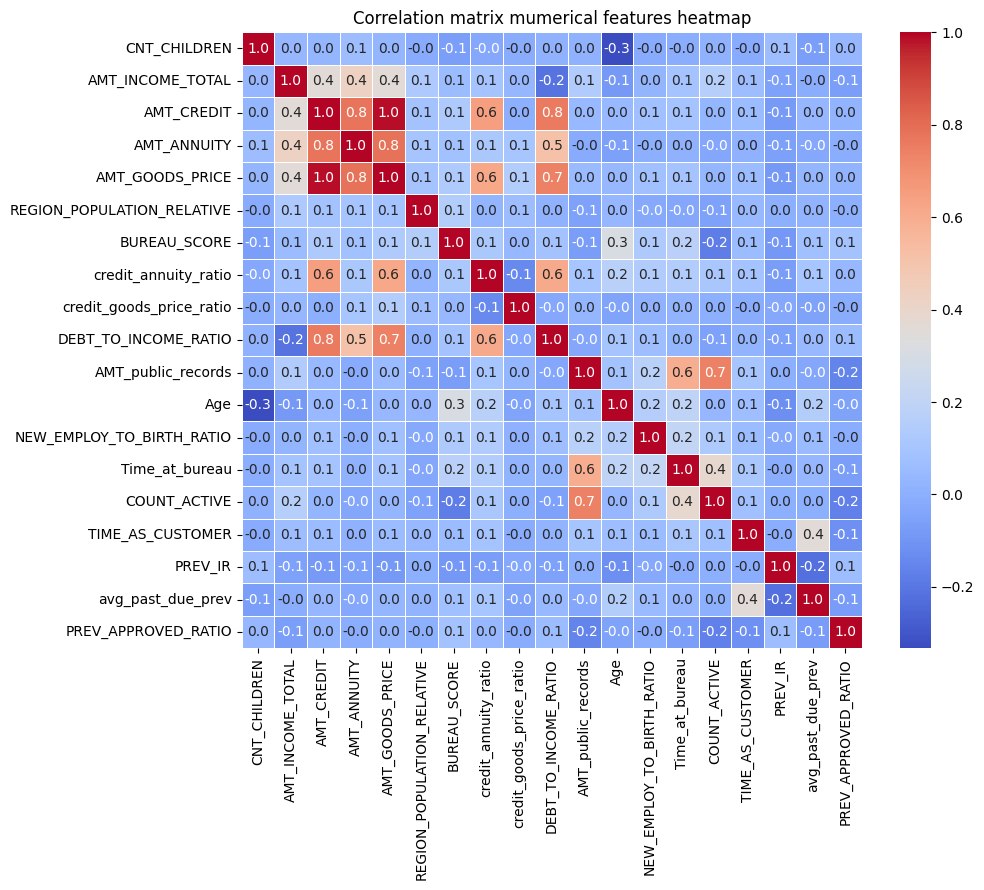

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'numerical' is a list of numerical column names
correlation_matrix = data2[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'BUREAU_SCORE', 'credit_annuity_ratio',
       'credit_goods_price_ratio', 'DEBT_TO_INCOME_RATIO',
       'AMT_public_records', 'Age', 'NEW_EMPLOY_TO_BIRTH_RATIO',
       'Time_at_bureau', 'COUNT_ACTIVE', 'TIME_AS_CUSTOMER', 'PREV_IR',
       'avg_past_due_prev', 'PREV_APPROVED_RATIO']].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=.5)
plt.title("Correlation matrix mumerical features heatmap")
plt.show()

## SCALING MAX VALUE FOR GROUPED VARIABLES

In [49]:
data3=data2.copy()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,43282.000,277634.909,103228.588,100001.000,188298.500,277695.500,367465.750,456250.000
CNT_CHILDREN,43282.000,0.389,0.686,0.000,0.000,0.000,1.000,3.000
AMT_INCOME_TOTAL,43282.000,156375.333,57580.847,26941.500,112500.000,157500.000,202500.000,299250.000
AMT_CREDIT,43282.000,483078.068,332411.731,45000.000,249095.250,422802.000,622413.000,2156400.000
AMT_ANNUITY,43282.000,27815.303,14374.100,2295.000,17451.000,25272.000,34956.000,177826.500
AMT_GOODS_PRICE,43282.000,430846.713,304499.776,45000.000,225000.000,360000.000,540000.000,1800000.000
REGION_POPULATION_RELATIVE,43282.000,0.020,0.013,0.000,0.010,0.019,0.026,0.073
BUREAU_SCORE,43282.000,0.504,0.140,0.001,0.414,0.516,0.608,0.855
credit_annuity_ratio,43282.000,16.994,6.176,8.037,12.586,16.219,20.000,32.219
credit_goods_price_ratio,43282.000,0.892,0.094,0.250,0.826,0.883,1.000,1.538


In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43282 entries, 0 to 48743
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SK_ID_CURR                           43282 non-null  int64  
 1   CODE_GENDER                          43282 non-null  object 
 2   FLAG_OWN_CAR                         43282 non-null  object 
 3   FLAG_OWN_REALTY                      43282 non-null  object 
 4   CNT_CHILDREN                         43282 non-null  int64  
 5   AMT_INCOME_TOTAL                     43282 non-null  float64
 6   AMT_CREDIT                           43282 non-null  float64
 7   AMT_ANNUITY                          43282 non-null  float64
 8   AMT_GOODS_PRICE                      43282 non-null  float64
 9   NAME_EDUCATION_TYPE                  43282 non-null  object 
 10  NAME_FAMILY_STATUS                   43282 non-null  object 
 11  NAME_HOUSING_TYPE                

In [51]:
import pandas as pd
import numpy as np
#hàm nhóm 
def bin_numeric_features(data, target_column, numeric_features, num_bins=10):
    result_data = data[[target_column] + numeric_features].copy()

    for feature in numeric_features:
        # Calculate min and max values for the current feature
        if int(data[feature].max()) < data[feature].max():
            feature_max = int(data[feature].max()+1)
        else:
            feature_max = int(age_data[feature].max)
        if int(data[feature].min()) < data[feature].min():
            feature_min = int(data[feature].min())
        else:
            feature_min = int(data[feature].min()-1)

        # Bin the feature data
        result_data[f'{feature}_BINNED'] = pd.cut(result_data[feature], bins=np.linspace(feature_min, feature_max, num=num_bins))

    return result_data

def calculate_iv_summary(data, target_column, feature_binned_column):
    # Create a new DataFrame for the summary table
    summary_table = pd.DataFrame()

    # Group by the binned feature
    grouped = data.groupby(feature_binned_column)

    # Calculate Count, Goods, Bads, Tot Distr, Distr Good, Distr Bad
    summary_table['Count'] = grouped[target_column].count()
    summary_table['Bads'] = grouped[target_column].sum()
    summary_table['Goods'] = summary_table['Count'] - summary_table['Bads']
    summary_table['Tot Distr'] = summary_table['Count'] / len(data) * 100
    summary_table['Distr Good'] = summary_table['Goods'] / summary_table['Goods'].sum()
    summary_table['Distr Bad'] = summary_table['Bads'] / summary_table['Bads'].sum()

    # Calculate Bad Rate
    summary_table['Bad Rate'] = summary_table['Bads'] / summary_table['Count']

    # Calculate WOE
    summary_table['WOE'] = np.log(summary_table['Distr Good'] / summary_table['Distr Bad']) * 100

    # Calculate IV for each bin
    summary_table['IV'] = (summary_table['Distr Good'] - summary_table['Distr Bad']) * np.log(
        summary_table['Distr Good'] / summary_table['Distr Bad']
    )

    # Reset the index to have the binned feature as a column
    summary_table.reset_index(inplace=True)

    # Add a "Total" row
    total_row = pd.DataFrame(
        {
            feature_binned_column: ['Total'],
            'Count': summary_table['Count'].sum(),
            'Goods': summary_table['Goods'].sum(),
            'Bads': summary_table['Bads'].sum(),
            'Tot Distr': 1.0,  # Total distribution is 100%
            'Distr Good': summary_table['Distr Good'].sum(),
            'Distr Bad': summary_table['Distr Bad'].sum(),
            'Bad Rate': summary_table['Bads'].sum() / summary_table['Count'].sum(),
            'WOE': np.log(summary_table['Distr Good'].sum() / summary_table['Distr Bad'].sum()) * 100,
        },
        index=[len(summary_table)],
    )

    summary_table = pd.concat([summary_table, total_row], ignore_index=True)

    # Calculate total IV
    total_iv = summary_table['IV'].sum()

    return total_iv, summary_table

0.0002529999999999 0.072508


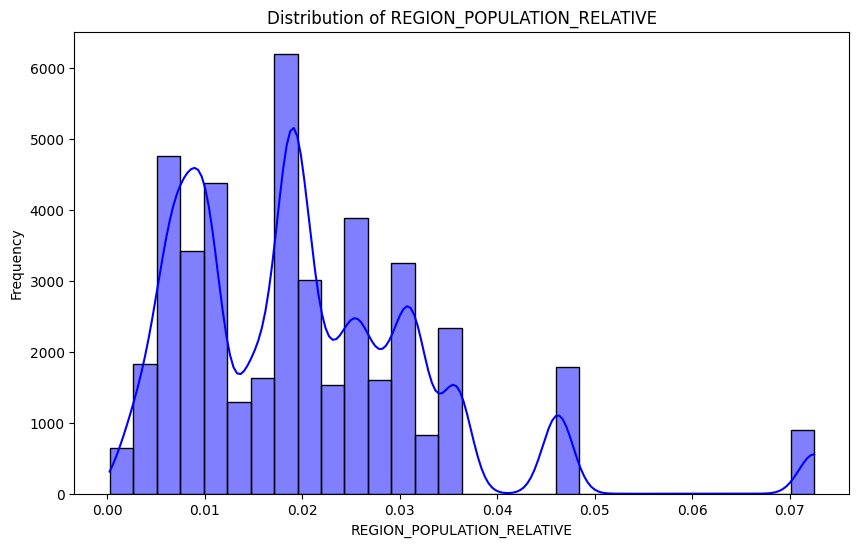

In [52]:
print(data3['REGION_POPULATION_RELATIVE'].min(),data3['REGION_POPULATION_RELATIVE'].max())
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ phân phối tần suất
plt.figure(figsize=(10, 6))
sns.histplot(data3['REGION_POPULATION_RELATIVE'], bins=30, kde=True, color='blue')

# Đặt tên cho trục và biểu đồ
plt.title('Distribution of REGION_POPULATION_RELATIVE')
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()


0.25 1.5384615384615385


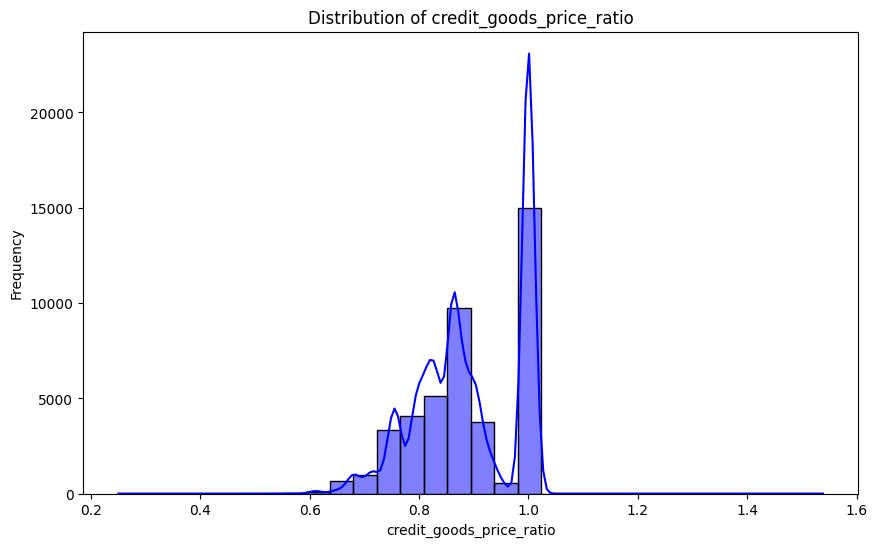

In [53]:
print(data3['credit_goods_price_ratio'].min(),data3['credit_goods_price_ratio'].max())
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ phân phối tần suất
plt.figure(figsize=(10, 6))
sns.histplot(data3['credit_goods_price_ratio'], bins=30, kde=True, color='blue')

# Đặt tên cho trục và biểu đồ
plt.title('Distribution of credit_goods_price_ratio')
plt.xlabel('credit_goods_price_ratio')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()


In [55]:
import pandas as pd
# Assuming 'df' is your DataFrame
# Remove outliers from 'AMT_INCOME_TOTAL' column
pd.set_option('display.max_columns', None)
#data2 = data2[data2['DEBT_TO_INCOME_RATIO'] < 40]
data3.loc[data3['AMT_ANNUITY'] > 80000, 'AMT_ANNUITY'] = 80000
data3.loc[data3['REGION_POPULATION_RELATIVE'] > 0.04, 'REGION_POPULATION_RELATIVE'] = 0.04
data3.loc[data3['BUREAU_SCORE'] > 0.889, 'BUREAU_SCORE'] = 0.889
data3.loc[data3['credit_goods_price_ratio'] > 1, 'credit_goods_price_ratio'] = 1
data3.loc[data3['DEBT_TO_INCOME_RATIO'] > 16.5, 'DEBT_TO_INCOME_RATIO'] = 16.5
data3['avg_past_due_prev'] = data3['avg_past_due_prev'].round().astype(int)
data3.loc[(data3['avg_past_due_prev'] >= 25) & (data3['avg_past_due_prev'] <=27), 'avg_past_due_prev'] = 25
data3.loc[(data3['avg_past_due_prev'] >= 28) & (data3['avg_past_due_prev'] <=31), 'avg_past_due_prev'] = 26
data3.loc[(data3['avg_past_due_prev'] > 31) & (data3['avg_past_due_prev'] <40), 'avg_past_due_prev'] = 27
data3.loc[data3['avg_past_due_prev'] ==40 , 'avg_past_due_prev']= 28
data3['credit_annuity_ratio'] = data3['credit_annuity_ratio'].round().astype(int)
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,43282.000,277634.909,103228.588,100001.000,188298.500,277695.500,367465.750,456250.000
CNT_CHILDREN,43282.000,0.389,0.686,0.000,0.000,0.000,1.000,3.000
AMT_INCOME_TOTAL,43282.000,156375.333,57580.847,26941.500,112500.000,157500.000,202500.000,299250.000
AMT_CREDIT,43282.000,483078.068,332411.731,45000.000,249095.250,422802.000,622413.000,2156400.000
AMT_ANNUITY,43282.000,27754.415,14080.992,2295.000,17451.000,25272.000,34956.000,80000.000
AMT_GOODS_PRICE,43282.000,430846.713,304499.776,45000.000,225000.000,360000.000,540000.000,1800000.000
REGION_POPULATION_RELATIVE,43282.000,0.019,0.011,0.000,0.010,0.019,0.026,0.040
BUREAU_SCORE,43282.000,0.504,0.140,0.001,0.414,0.516,0.608,0.855
credit_annuity_ratio,43282.000,17.046,6.202,8.000,13.000,16.000,20.000,32.000
credit_goods_price_ratio,43282.000,0.892,0.094,0.250,0.826,0.883,1.000,1.000


0.0 30.0


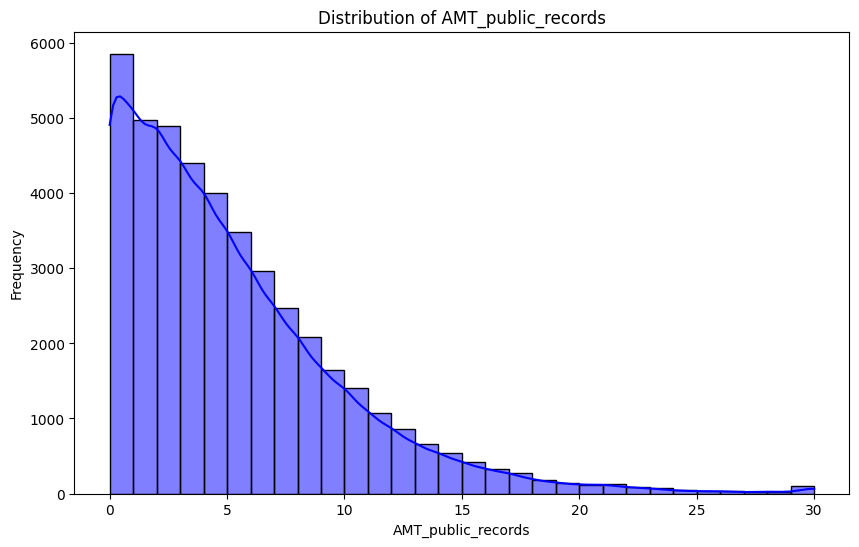

In [56]:
print(data3['AMT_public_records'].min(),data3['AMT_public_records'].max())
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ phân phối tần suất
plt.figure(figsize=(10, 6))
sns.histplot(data3['AMT_public_records'], bins=30, kde=True, color='blue')

# Đặt tên cho trục và biểu đồ
plt.title('Distribution of AMT_public_records')
plt.xlabel('AMT_public_records')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()


0.0 13.0


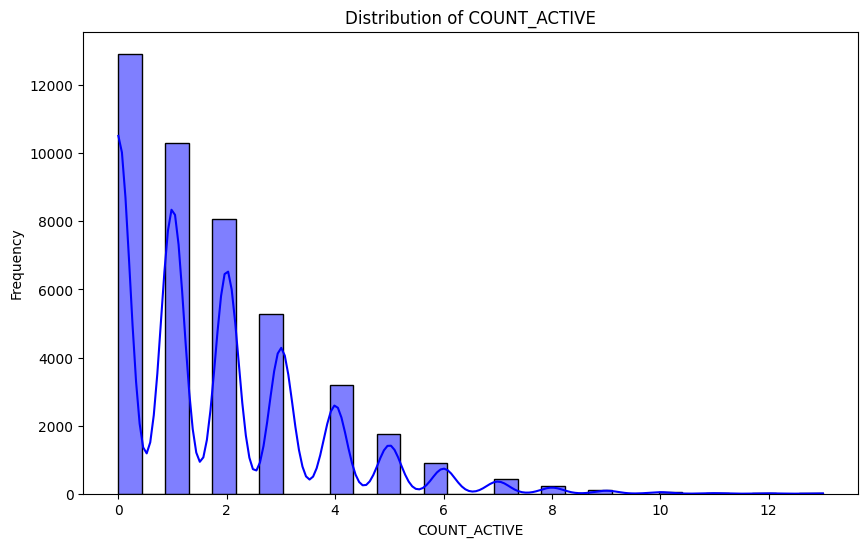

In [57]:
print(data3['COUNT_ACTIVE'].min(),data3['COUNT_ACTIVE'].max())
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ phân phối tần suất
plt.figure(figsize=(10, 6))
sns.histplot(data3['COUNT_ACTIVE'], bins=30, kde=True, color='blue')

# Đặt tên cho trục và biểu đồ
plt.title('Distribution of COUNT_ACTIVE')
plt.xlabel('COUNT_ACTIVE')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()


0.0 8.0


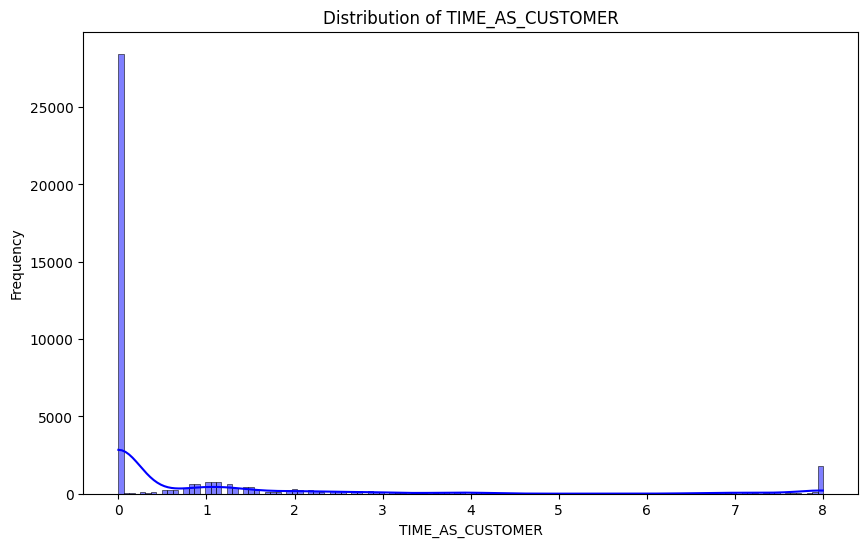

In [58]:
print(data3['TIME_AS_CUSTOMER'].min(),data3['TIME_AS_CUSTOMER'].max())
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ phân phối tần suất
plt.figure(figsize=(10, 6))
sns.histplot(data3['TIME_AS_CUSTOMER'], kde=True, color='blue')

# Đặt tên cho trục và biểu đồ
plt.title('Distribution of TIME_AS_CUSTOMER')
plt.xlabel('TIME_AS_CUSTOMER')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()


0 28


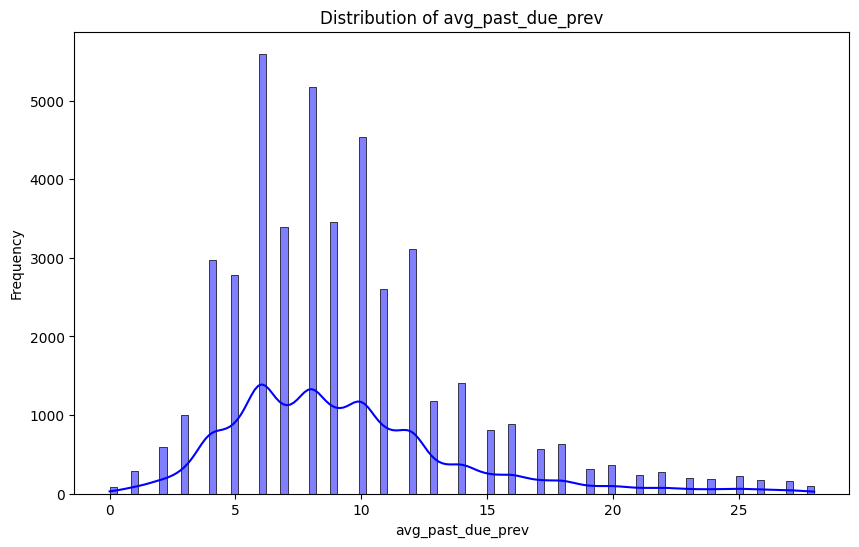

In [59]:
print(data3['avg_past_due_prev'].min(),data3['avg_past_due_prev'].max())
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ phân phối tần suất
plt.figure(figsize=(10, 6))
sns.histplot(data3['avg_past_due_prev'], kde=True, color='blue')

# Đặt tên cho trục và biểu đồ
plt.title('Distribution of avg_past_due_prev')
plt.xlabel('avg_past_due_prev')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()


In [60]:
data3['avg_past_due_prev'].value_counts().to_frame().T.sort_values(by='avg_past_due_prev', axis=1)

avg_past_due_prev,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,80,290,590,994,2970,2785,5598,3398,5177,3451,4534,2600,3116,1177,1406,807,891,565,627,313,359,239,273,200,190,227,178,155,92


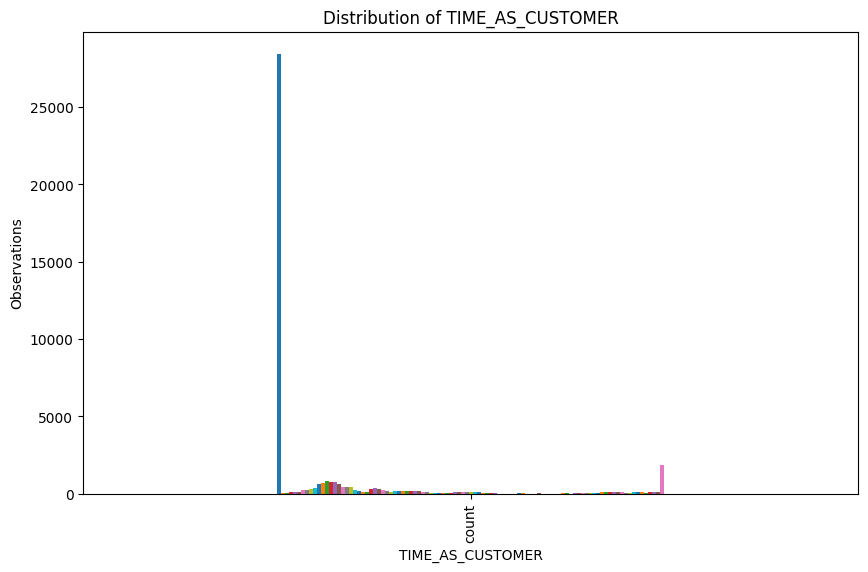

TIME_AS_CUSTOMER,0.000,0.083,0.167,0.250,0.333,0.417,0.500,0.583,0.667,0.750,0.833,0.917,1.000,1.083,1.167,1.250,1.333,1.417,1.500,1.583,1.667,1.750,1.833,1.917,2.000,2.083,2.167,2.250,2.333,2.417,2.500,2.583,2.667,2.750,2.833,2.917,3.000,3.083,3.167,3.250,3.333,3.417,3.500,3.583,3.667,3.750,3.833,3.917,4.000,4.083,4.167,4.250,4.333,4.417,4.500,4.583,4.667,4.750,4.833,4.917,5.000,5.083,5.167,5.250,5.333,5.417,5.500,5.583,5.667,5.750,5.833,5.917,6.000,6.083,6.167,6.250,6.333,6.417,6.500,6.583,6.667,6.750,6.833,6.917,7.000,7.083,7.167,7.250,7.333,7.417,7.500,7.583,7.667,7.750,7.833,7.917,8.000
count,28453,34,34,90,74,93,223,236,273,381,612,654,786,739,756,639,401,449,442,249,139,107,131,269,337,269,259,195,130,151,151,161,148,170,173,137,127,114,67,29,25,52,46,56,98,116,124,130,104,109,80,64,21,17,8,2,5,4,4,1,9,9,5,4,3,8,6,5,6,3,6,9,11,6,11,11,7,20,28,46,69,103,114,74,82,91,91,64,66,82,94,72,70,71,79,82,1817


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame từ Series value_counts() và sắp xếp theo cột TIME_AS_CUSTOMER
observation_counts_df = data3['TIME_AS_CUSTOMER'].value_counts().to_frame().T.sort_values(by='TIME_AS_CUSTOMER', axis=1)

# Vẽ biểu đồ
observation_counts_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Distribution of TIME_AS_CUSTOMER')
plt.xlabel('TIME_AS_CUSTOMER')
plt.ylabel('Observations')
plt.show()
data3['TIME_AS_CUSTOMER'].value_counts().to_frame().T.sort_values(by='TIME_AS_CUSTOMER', axis=1)


In [63]:
# Creating the FLAG_NEW_CUSTOMER variable
data3['FLAG_NEW_CUSTOMER'] = data3['TIME_AS_CUSTOMER'].apply(lambda x: 1 if x == 0 else 0)
# Dropping the original TIME_AS_CUSTOMER variable if needed
# data3.drop('TIME_AS_CUSTOMER', axis=1, inplace=True)

## GROUPED VARIABLES AGE

In [66]:
data4 = data3.copy()
columns_to_remove = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TIME_AS_CUSTOMER','total_past_due_prev',
                     'NEW_PREDICTED_EMPLOY_TO_BIRTH_RATIO','PREV_APPROVED_RATIO']
# Drop specified columns from the copied DataFrame
data4.drop(columns=columns_to_remove, inplace=True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43282 entries, 0 to 48743
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  43282 non-null  int64  
 1   CODE_GENDER                 43282 non-null  object 
 2   FLAG_OWN_CAR                43282 non-null  object 
 3   FLAG_OWN_REALTY             43282 non-null  object 
 4   CNT_CHILDREN                43282 non-null  int64  
 5   NAME_EDUCATION_TYPE         43282 non-null  object 
 6   NAME_FAMILY_STATUS          43282 non-null  object 
 7   NAME_HOUSING_TYPE           43282 non-null  object 
 8   REGION_POPULATION_RELATIVE  43282 non-null  float64
 9   OCCUPATION_TYPE             43282 non-null  object 
 10  BUREAU_SCORE                43282 non-null  float64
 11  credit_annuity_ratio        43282 non-null  int32  
 12  credit_goods_price_ratio    43282 non-null  float64
 13  DEBT_TO_INCOME_RATIO        43282 no

In [67]:
objects = ['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE']
floats = ['REGION_POPULATION_RELATIVE','BUREAU_SCORE',
       'credit_goods_price_ratio', 'DEBT_TO_INCOME_RATIO',
       'AMT_public_records', 'Age', 'NEW_EMPLOY_TO_BIRTH_RATIO',
       'Time_at_bureau', 'COUNT_ACTIVE', 'PREV_IR' ]
ints = ['avg_past_due_prev','FLAG_NEW_CUSTOMER', 'HAS_BEEN_REJECTED']

##### CODE GENDER

In [69]:
# Thay thế giá trị 'F' bằng 0 và 'M' bằng 1
data4['CODE_GENDER'] = data4['CODE_GENDER'].replace({'F': 0, 'M': 1})
import pandas as pd
# Thay thế giá trị theo yêu cầu
data4['FLAG_OWN_CAR'] = data4['FLAG_OWN_CAR'].replace({'Y': 0, 'N': 1})
data4['FLAG_OWN_REALTY'] = data4['FLAG_OWN_REALTY'].replace({'Y': 0, 'N': 1})
data4['NAME_EDUCATION_TYPE'] = data4['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special': 3, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 4, 'Academic degree': 0})
data4['NAME_FAMILY_STATUS'] = data4['NAME_FAMILY_STATUS'].replace({'Single / not married': 3, 'Married': 1, 'Civil marriage': 4, 'Widow': 0, 'Separated': 2})

# Thay thế giá trị của NAME_HOUSING_TYPE bằng số
data4['NAME_HOUSING_TYPE'] = data4['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 2,
    'Rented apartment': 5,
    'With parents': 4,
    'Municipal apartment': 3,
    'Office apartment': 0,
    'Co-op apartment': 1
})

# Thay thế giá trị của OCCUPATION_TYPE bằng số
data4['OCCUPATION_TYPE'] = data4['OCCUPATION_TYPE'].replace({
    'Accountants': 0,
    'HR staff': 1,
    'Managers': 2,
    'High skill tech staff': 3,
    'Core staff': 4,
    'Other': 5,
    'Medicine staff': 6,
    'Secretaries': 7,
    'Private service staff': 8,
    'IT staff': 9,
    'Realty agents': 10,
    'Cleaning staff': 11,
    'Sales staff': 12,
    'Cooking staff': 13,
    'Security staff': 14,
    'Laborers': 15,
    'Waiters/barmen staff': 16,
    'Drivers': 17,
    'Low-skill Laborers': 18
})

data4


,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,PREV_IR,avg_past_due_prev,FLAG_NEW_CUSTOMER
0,100001,0,1,0,0,1,1,2,0.019,5,0.567,28,0.791,4.213,7.000,52.715,0.121,4.307,3.000,0.532,2,1
1,100005,1,1,0,0,3,1,2,0.036,18,0.430,13,0.808,2.250,3.000,49.490,0.247,1.022,2.000,0.438,8,1
2,100013,1,0,0,0,1,1,2,0.019,17,0.655,10,0.950,3.275,4.000,54.899,0.222,5.671,0.000,0.335,12,0
4,100038,1,0,1,1,3,1,2,0.010,5,0.314,20,1.000,3.475,0.000,35.726,0.168,0.000,0.000,0.320,12,1
5,100042,0,0,0,0,3,1,2,0.025,17,0.511,28,0.844,3.554,14.000,50.970,0.646,7.460,8.000,0.204,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,1,0,0,3,0,2,0.002,5,0.646,24,0.654,3.396,5.000,54.712,0.259,3.663,2.000,0.158,3,1
48740,456222,0,1,1,2,3,1,2,0.036,12,0.685,20,0.795,3.952,0.000,30.647,0.103,0.000,0.000,0.276,16,1
48741,456223,0,0,0,1,3,1,2,0.026,5,0.550,9,1.000,1.556,5.000,43.622,0.191,2.786,1.000,0.198,4,1
48742,456224,1,1,1,0,1,1,2,0.019,2,0.471,18,1.000,2.000,17.000,38.268,0.196,7.501,6.000,0.344,13,1


### GROUPED NUMERICAL VARIABLES

In [70]:
data5 = data4.copy()
print(data5.info())
data5.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 43282 entries, 0 to 48743
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  43282 non-null  int64  
 1   CODE_GENDER                 43282 non-null  int64  
 2   FLAG_OWN_CAR                43282 non-null  int64  
 3   FLAG_OWN_REALTY             43282 non-null  int64  
 4   CNT_CHILDREN                43282 non-null  int64  
 5   NAME_EDUCATION_TYPE         43282 non-null  int64  
 6   NAME_FAMILY_STATUS          43282 non-null  int64  
 7   NAME_HOUSING_TYPE           43282 non-null  int64  
 8   REGION_POPULATION_RELATIVE  43282 non-null  float64
 9   OCCUPATION_TYPE             43282 non-null  int64  
 10  BUREAU_SCORE                43282 non-null  float64
 11  credit_annuity_ratio        43282 non-null  int32  
 12  credit_goods_price_ratio    43282 non-null  float64
 13  DEBT_TO_INCOME_RATIO        43282 no

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,BUREAU_SCORE,credit_annuity_ratio,credit_goods_price_ratio,DEBT_TO_INCOME_RATIO,AMT_public_records,Age,NEW_EMPLOY_TO_BIRTH_RATIO,Time_at_bureau,COUNT_ACTIVE,PREV_IR,avg_past_due_prev,FLAG_NEW_CUSTOMER
count,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000,43282.000
mean,277634.909,0.316,0.684,0.310,0.389,2.511,1.564,2.152,0.019,8.421,0.504,17.046,0.892,3.255,5.027,44.112,0.168,4.172,1.759,0.249,9.335,0.657
std,103228.588,0.465,0.465,0.463,0.686,0.859,1.076,0.601,0.011,5.180,0.140,6.202,0.094,2.154,4.717,12.012,0.119,2.685,1.798,0.098,4.709,0.475
min,100001.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,8.000,0.250,0.193,0.000,20.104,0.000,0.000,0.000,0.033,0.000,0.000
25%,188298.500,0.000,0.000,0.000,0.000,2.000,1.000,2.000,0.010,5.000,0.414,13.000,0.826,1.761,1.000,34.091,0.077,1.866,0.000,0.180,6.000,0.000
50%,277695.500,0.000,1.000,0.000,0.000,3.000,1.000,2.000,0.019,5.000,0.516,16.000,0.883,2.750,4.000,43.323,0.157,4.359,1.000,0.238,8.000,1.000
75%,367465.750,1.000,1.000,1.000,1.000,3.000,2.000,2.000,0.026,15.000,0.608,20.000,1.000,4.140,7.000,54.148,0.214,6.849,3.000,0.306,11.000,1.000
max,456250.000,1.000,1.000,1.000,3.000,4.000,4.000,5.000,0.040,18.000,0.855,32.000,1.000,16.500,30.000,69.027,0.721,8.005,13.000,0.720,28.000,1.000


In [72]:
data5.to_excel('9.test_data.xlsx')